In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Check for GPU
import tensorflow as tf
try:
    from google.colab import drive
    IN_COLAB=True
except:
    IN_COLAB=False

if IN_COLAB:
    print("We're running Colab")
else:
    print(tf.config.list_physical_devices())
    print('\nCUDA GPU: ' + str(tf.test.is_gpu_available(cuda_only=True)))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.

CUDA GPU: False


# Data Preprocessing

In [3]:
import os
os.chdir('..')
df = pd.read_csv('./daily01-ithaca/daily01-NY_Ithaca_13_E.csv', header = 0, index_col = 0)
Date = pd.to_datetime(df.LST_DATE, format='%Y%m%d', errors='coerce')
df['Time'] = Date

In [4]:
df.columns

Index(['WBANNO', 'LST_DATE', 'CRX_VN', 'LONGITUDE', 'LATITUDE', 'T_DAILY_MAX',
       'T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_AVG', 'P_DAILY_CALC',
       'SOLARAD_DAILY', 'SUR_TEMP_DAILY_TYPE', 'SUR_TEMP_DAILY_MAX',
       'SUR_TEMP_DAILY_MIN', 'SUR_TEMP_DAILY_AVG', 'RH_DAILY_MAX',
       'RH_DAILY_MIN', 'RH_DAILY_AVG', 'SOIL_MOISTURE_5_DAILY',
       'SOIL_MOISTURE_10_DAILY', 'SOIL_MOISTURE_20_DAILY',
       'SOIL_MOISTURE_50_DAILY', 'SOIL_MOISTURE_100_DAILY',
       'SOIL_TEMP_5_DAILY', 'SOIL_TEMP_10_DAILY', 'SOIL_TEMP_20_DAILY',
       'SOIL_TEMP_50_DAILY', 'SOIL_TEMP_100_DAILY', 'Time'],
      dtype='object')

In [5]:
data = df[['T_DAILY_MAX',
       'T_DAILY_MIN', 'T_DAILY_MEAN', 'T_DAILY_AVG', 'P_DAILY_CALC',
       'SOLARAD_DAILY', 'SUR_TEMP_DAILY_MAX',
       'SUR_TEMP_DAILY_MIN', 'SUR_TEMP_DAILY_AVG', 'RH_DAILY_MAX',
       'RH_DAILY_MIN', 'RH_DAILY_AVG']]

In [6]:
data.index = df['Time']
data.isna().sum()

T_DAILY_MAX             76
T_DAILY_MIN             76
T_DAILY_MEAN            76
T_DAILY_AVG             77
P_DAILY_CALC            47
SOLARAD_DAILY           56
SUR_TEMP_DAILY_MAX     438
SUR_TEMP_DAILY_MIN     438
SUR_TEMP_DAILY_AVG      56
RH_DAILY_MAX          2405
RH_DAILY_MIN          2405
RH_DAILY_AVG          2405
dtype: int64

In [7]:
# forward fill the missing values
data.ffill(axis = 0, inplace = True)
# drop NaN at the top
data.dropna(inplace = True)
# set target
data['target'] = data['T_DAILY_AVG']

In [8]:
data

,T_DAILY_MAX,T_DAILY_MIN,T_DAILY_MEAN,T_DAILY_AVG,P_DAILY_CALC,SOLARAD_DAILY,SUR_TEMP_DAILY_MAX,SUR_TEMP_DAILY_MIN,SUR_TEMP_DAILY_AVG,RH_DAILY_MAX,RH_DAILY_MIN,RH_DAILY_AVG,target
Time,,,,,,,,,,,,,
2011-04-13,7.6,5.3,6.4,6.4,18.9,2.66,13.4,5.7,7.1,96.9,75.2,91.3,6.4
2011-04-14,12.3,1.1,6.7,6.6,0.0,23.43,20.7,0.6,8.7,95.6,50.2,76.3,6.6
2011-04-15,11.7,-2.9,4.4,5.4,0.0,20.62,20.3,-2.6,7.2,79.9,27.2,53.4,5.4
2011-04-16,8.1,2.5,5.3,5.2,36.1,5.13,8.8,2.3,5.1,97.3,62.2,81.1,5.2
2011-04-17,9.8,1.4,5.6,5.6,4.7,9.53,12.6,0.8,5.9,96.8,40.5,68.6,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-01,3.5,-2.2,0.6,0.2,3.0,5.25,9.0,-4.6,0.3,89.9,69.2,83.8,0.2
2023-11-02,6.1,-3.3,1.4,1.0,0.0,6.21,12.1,-5.2,0.6,90.0,53.4,75.2,1.0
2023-11-03,12.9,1.4,7.1,7.4,0.0,10.68,13.5,-1.1,5.7,63.6,26.1,43.0,7.4


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, shuffle = False)

In [10]:
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [11]:
train.shape

(3672, 13)

In [12]:
test.shape

(918, 13)

In [13]:
# splitting data into sequences
def split_sequences(features, target, seq_len, forecast_len):
    X,y = list(), list()
    for i in range(len(features)):
        end_input = i + seq_len
        end_predict = end_input + forecast_len
        if end_predict > len(features)-1:
            break
        seq_x, seq_y = features[i:end_input,:], target[end_input:end_predict]
        X.append(seq_x)
        y.append(seq_y)
    return tf.convert_to_tensor(X, dtype=tf.float64), tf.convert_to_tensor(y, dtype=tf.float64)

# Define Model

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, RNN, LSTMCell, Input, Bidirectional
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model

class MyModel(tf.keras.Model):

    def __init__(self, input_shape, output_shape, hidden_units = 30, activation_type = 'tanh', name = 'LSTM'):
        super().__init__(name = name)
        self.input_layer = Input(shape = input_shape, name = 'input')
        self.lstm1 = LSTM(units=hidden_units, activation = activation_type, input_shape = input_shape, return_sequences=False, name = 'lstm_1')
        self.dense1 = Dense(units=output_shape, activation = 'sigmoid', name = 'dense_1')
        #self.dropout = tf.keras.layers.Dropout(0.5)

    def call(self, inputs, training=False):
        x = self.lstm1(inputs)
        x = self.dense1(x)
        #if training:
        #  x = self.dropout(x, training=training)
        return x

    def summary(self):
        model = Model(inputs = [self.input_layer], outputs = self.call(self.input_layer), name = self.name)
        return model.summary()

# Model Training
## input length : output length = 16:4

In [15]:
# prepare sequences
seq_len = 16
forecast_len = 4
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)
n_features = X_train.shape[2]

In [16]:
X_train.shape

TensorShape([3652, 16, 12])

In [17]:
y_train.shape

TensorShape([3652, 4])

In [18]:
# create model instance
model_name = 'LSTM_16-4'
model = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), name = model_name)
model.summary()

Model: "LSTM_16-4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 16, 12)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                5160      
                                                                 
 dense_1 (Dense)             (None, 4)                 124       
                                                                 
Total params: 5,284
Trainable params: 5,284
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fit the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse', 'acc'])
model.fit(X_train,
          y_train,
          batch_size=100,
          epochs=30,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)
# traning for > 40 epoch starts to overfit

Epoch 1/30
33/33 [==============================] - 2s 15ms/step - loss: 0.0158 - mse: 0.0158 - acc: 0.2374 - val_loss: 0.0086 - val_mse: 0.0086 - val_acc: 0.2678
Epoch 2/30
33/33 [==============================] - 0s 4ms/step - loss: 0.0086 - mse: 0.0086 - acc: 0.2401 - val_loss: 0.0078 - val_mse: 0.0078 - val_acc: 0.2514
Epoch 3/30
33/33 [==============================] - 0s 4ms/step - loss: 0.0081 - mse: 0.0081 - acc: 0.2663 - val_loss: 0.0074 - val_mse: 0.0074 - val_acc: 0.2978
Epoch 4/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0080 - mse: 0.0080 - acc: 0.2809 - val_loss: 0.0073 - val_mse: 0.0073 - val_acc: 0.3497
Epoch 5/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0079 - mse: 0.0079 - acc: 0.3131 - val_loss: 0.0071 - val_mse: 0.0071 - val_acc: 0.3852
Epoch 6/30
33/33 [==============================] - 0s 5ms/step - loss: 0.0079 - mse: 0.0079 - acc: 0.3281 - val_loss: 0.0070 - val_mse: 0.0070 - val_acc: 0.3115
Epoch 7/30
33/33 [=========

In [20]:
# save trained model
model.save('./LSTM/models_daily_v2/' + model_name)
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('mean_squared_error')
print('train set:', mean_squared_error(y_train, y_hat_train, sample_weight=None))
print('test set:', mean_squared_error(y_test, y_hat_test, sample_weight=None))

INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_16-4\assets


INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_16-4\assets


29/29 [==============================] - 0s 911us/step
mean_squared_error
train set: 0.006848143924325187
test set: 0.006876010535207377


## input length : output length = 24:6

In [21]:
# reset memory
tf.Graph().as_default()

# prepare sequences
seq_len = 24
forecast_len = 6
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)
n_features = X_train.shape[2]

In [22]:
# create model instance
model_name = 'LSTM_24-6'
model = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), name = model_name)
model.summary()

Model: "LSTM_24-6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24, 12)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                5160      
                                                                 
 dense_1 (Dense)             (None, 6)                 186       
                                                                 
Total params: 5,346
Trainable params: 5,346
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Fit the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse', 'acc'])
model.fit(X_train,
          y_train,
          batch_size=100,
          epochs=40,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)

Epoch 1/40
33/33 [==============================] - 2s 15ms/step - loss: 0.0166 - mse: 0.0166 - acc: 0.1471 - val_loss: 0.0086 - val_mse: 0.0086 - val_acc: 0.1397
Epoch 2/40
33/33 [==============================] - 0s 5ms/step - loss: 0.0087 - mse: 0.0087 - acc: 0.1770 - val_loss: 0.0077 - val_mse: 0.0077 - val_acc: 0.1753
Epoch 3/40
33/33 [==============================] - 0s 5ms/step - loss: 0.0084 - mse: 0.0084 - acc: 0.1959 - val_loss: 0.0077 - val_mse: 0.0077 - val_acc: 0.2274
Epoch 4/40
33/33 [==============================] - 0s 6ms/step - loss: 0.0082 - mse: 0.0082 - acc: 0.2017 - val_loss: 0.0075 - val_mse: 0.0075 - val_acc: 0.1644
Epoch 5/40
33/33 [==============================] - 0s 5ms/step - loss: 0.0081 - mse: 0.0081 - acc: 0.2060 - val_loss: 0.0076 - val_mse: 0.0076 - val_acc: 0.2603
Epoch 6/40
33/33 [==============================] - 0s 5ms/step - loss: 0.0080 - mse: 0.0080 - acc: 0.2063 - val_loss: 0.0079 - val_mse: 0.0079 - val_acc: 0.2219
Epoch 7/40
33/33 [=========

In [24]:
# evaluate the model
# save trained model
model.save('./LSTM/models_daily_v2/' + model_name)
from sklearn.metrics import mean_squared_error

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('mean_squared_error')
print('train set:', mean_squared_error(y_train, y_hat_train, sample_weight=None))
print('test set:', mean_squared_error(y_test, y_hat_test, sample_weight=None))

INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_24-6\assets


INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_24-6\assets


28/28 [==============================] - 0s 1ms/step
mean_squared_error
train set: 0.007013208249888376
test set: 0.00734360034315104


## input length : output length = 32:8

In [25]:
# reset memory
tf.Graph().as_default()

# prepare sequences
seq_len = 32
forecast_len = 8
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)
n_features = X_train.shape[2]

In [26]:
# create model instance
model_name = 'LSTM_32-8'
model = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), name = model_name)
model.summary()

Model: "LSTM_32-8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32, 12)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                5160      
                                                                 
 dense_1 (Dense)             (None, 8)                 248       
                                                                 
Total params: 5,408
Trainable params: 5,408
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Fit the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse', 'acc'])
model.fit(X_train,
          y_train,
          batch_size=100,
          epochs=30,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)

Epoch 1/30
33/33 [==============================] - 2s 17ms/step - loss: 0.0207 - mse: 0.0207 - acc: 0.1178 - val_loss: 0.0092 - val_mse: 0.0092 - val_acc: 0.1236
Epoch 2/30
33/33 [==============================] - 0s 7ms/step - loss: 0.0092 - mse: 0.0092 - acc: 0.1319 - val_loss: 0.0079 - val_mse: 0.0079 - val_acc: 0.1511
Epoch 3/30
33/33 [==============================] - 0s 7ms/step - loss: 0.0087 - mse: 0.0087 - acc: 0.1551 - val_loss: 0.0077 - val_mse: 0.0077 - val_acc: 0.1236
Epoch 4/30
33/33 [==============================] - 0s 7ms/step - loss: 0.0085 - mse: 0.0085 - acc: 0.1518 - val_loss: 0.0076 - val_mse: 0.0076 - val_acc: 0.1896
Epoch 5/30
33/33 [==============================] - 0s 7ms/step - loss: 0.0083 - mse: 0.0083 - acc: 0.1738 - val_loss: 0.0074 - val_mse: 0.0074 - val_acc: 0.1896
Epoch 6/30
33/33 [==============================] - 0s 7ms/step - loss: 0.0083 - mse: 0.0083 - acc: 0.1909 - val_loss: 0.0078 - val_mse: 0.0078 - val_acc: 0.1786
Epoch 7/30
33/33 [=========

In [28]:
# save trained model
model.save('./LSTM/models_daily_v2/' + model_name)
# evaluate the model
from sklearn.metrics import mean_squared_error

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('mean_squared_error')
print('train set:', mean_squared_error(y_train, y_hat_train, sample_weight=None))
print('test set:', mean_squared_error(y_test, y_hat_test, sample_weight=None))

INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_32-8\assets


INFO:tensorflow:Assets written to: ./LSTM/models_daily_v2/LSTM_32-8\assets


28/28 [==============================] - 0s 1ms/step
mean_squared_error
train set: 0.007214247874597157
test set: 0.007903344178832789


## input length : output length = 40:10

In [29]:
# reset memory
tf.Graph().as_default()

# prepare sequences
seq_len = 40
forecast_len = 10
X_train, y_train = split_sequences(train[:,:-1], train[:,-1], seq_len = seq_len, forecast_len = forecast_len)
X_test, y_test = split_sequences(test[:,:-1], test[:,-1],seq_len = seq_len, forecast_len =  forecast_len)
n_features = X_train.shape[2]

In [30]:
# create model instance
model_name = 'LSTM_40-10'
model = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), name = model_name)
model.summary()

Model: "LSTM_40-10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 40, 12)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 30)                5160      
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
Total params: 5,470
Trainable params: 5,470
Non-trainable params: 0
_________________________________________________________________


In [31]:
# Fit the model
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse'])
model.fit(X_train,
          y_train,
          batch_size=100,
          epochs=30,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)

Epoch 1/30
33/33 [==============================] - 2s 29ms/step - loss: 0.0185 - mse: 0.0185 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 2/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 3/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 4/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 5/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0087 - mse: 0.0087 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 6/30
33/33 [==============================] - 0s 11ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 7/30
33/33 [==============================] - 0s 11ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 8/30
33/33 [==============================] - 0s 10ms/step - loss: 0.0085 - m

In [32]:
# save trained model
# model.save('./LSTM/models_daily_v2/' + model_name)
# evaluate the model
from sklearn.metrics import mean_squared_error

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print('mean_squared_error')
print('train set:', mean_squared_error(y_train, y_hat_train, sample_weight=None))
print('test set:', mean_squared_error(y_test, y_hat_test, sample_weight=None))

28/28 [==============================] - 0s 2ms/step
mean_squared_error
train set: 0.007447658622958811
test set: 0.007617786699015383


# Comparing different activation functions in LSTM layer

In [33]:
model_2 = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), activation_type='relu', name = 'LSTM_40-10_relu')
model_3 = MyModel(input_shape = (seq_len, n_features), output_shape = (forecast_len), activation_type='softmax', name = 'LSTM_40-10_softmax')

In [34]:
model_2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse'])
model_2.fit(X_train,
          y_train,
          batch_size=100,
          epochs=30,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)

Epoch 1/30
33/33 [==============================] - 1s 15ms/step - loss: 0.0237 - mse: 0.0237 - val_loss: 0.0187 - val_mse: 0.0187
Epoch 2/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0114 - mse: 0.0114 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 3/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0096 - mse: 0.0096 - val_loss: 0.0084 - val_mse: 0.0084
Epoch 4/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 5/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 6/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0077 - val_mse: 0.0077
Epoch 7/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 8/30
33/33 [==============================] - 0s 9ms/step - loss: 0.0087 - mse: 0.0

In [35]:
model_3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics = ['mse'])
model_3.fit(X_train,
          y_train,
          batch_size=100,
          epochs=40,
          verbose='auto',
          callbacks=None,
          validation_split=0.1,
          shuffle=True)

Epoch 1/40
33/33 [==============================] - 1s 15ms/step - loss: 0.0392 - mse: 0.0392 - val_loss: 0.0318 - val_mse: 0.0318
Epoch 2/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0172 - val_mse: 0.0172
Epoch 3/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0138 - mse: 0.0138 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 4/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 5/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 7/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 8/40
33/33 [==============================] - 0s 9ms/step - loss: 0.0089 - mse: 0.0

28/28 [==============================] - 0s 2ms/step


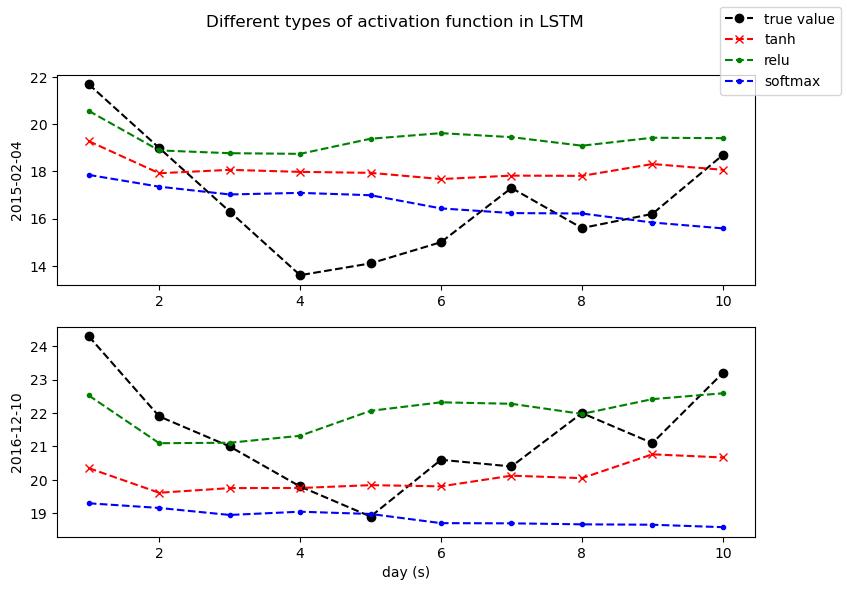

<Figure size 640x480 with 0 Axes>

In [40]:
y_hat_test = model.predict(X_test)
y_hat_test_relu = model_2.predict(X_test)
y_hat_test_softmax = model_3.predict(X_test)
i,j = np.random.randint(low=0, high=y_test.shape[0], size=(2,))

# convert back to real temperatures
scalar2 = MinMaxScaler()
scalar2.min_, scalar2.scale_ = scaler.min_[3], scaler.scale_[3]
t_test = scalar2.inverse_transform(y_test)
t_hat_test_relu = scalar2.inverse_transform(y_hat_test_relu)
t_hat_test_softmax = scalar2.inverse_transform(y_hat_test_softmax)
t_hat_test = scalar2.inverse_transform(y_hat_test)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,6))
fig.suptitle('Different types of activation function in LSTM')

l1, = ax1.plot(np.arange(1,forecast_len+1) , t_test[j,:], 'ko--', label = 'true value')
l2, = ax1.plot(np.arange(1,forecast_len+1),t_hat_test[j,:], 'rx--', label='tanh')
l3, = ax1.plot(np.arange(1,forecast_len+1),t_hat_test_relu[j,:], 'g.--', label='relu')
l4, = ax1.plot(np.arange(1,forecast_len+1),t_hat_test_softmax[j,:], 'b.--', label='softmax')
ax1.set_ylabel(str(np.asarray(df['Time'].dt.date)[train.shape[0] + j]))


ax2.plot(np.arange(1,forecast_len+1) , t_test[i,:], 'ko--', label = 'true value')
ax2.plot(np.arange(1,forecast_len+1),t_hat_test[i,:], 'rx--', label='tanh')
ax2.plot(np.arange(1,forecast_len+1),t_hat_test_relu[i,:], 'g.--', label='relu')
ax2.plot(np.arange(1,forecast_len+1),t_hat_test_softmax[i,:], 'b.--', label='softmax')
ax2.set_ylabel(str(np.asarray(df['Time'].dt.date)[train.shape[0] + i]))
ax2.set_xlabel('day (s)')
fig.legend([l1,l2,l3,l4],["true value", "tanh", "relu", "softmax"], loc="outside upper right")
plt.show()
plt.savefig("./activation_comp.png") 